In [14]:
#!pip install opencv-python
#!apt-get update ##[edited]
#!apt-get install ffmpeg libsm6 libxext6  -y

In [1]:
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import s3fs
import numpy as np
import boto3
import cv2

In [9]:
fs = s3fs.S3FileSystem()

# To List 5 files in your accessible bucket
images = fs.ls('s3://sxm-ecommerce-p66-location-data/raw_roadmaps/raw_roadmap_' + str(0) + '/')
images = images[-2:]
print(images)
#images = (images[-4:])
#print(images)

['sxm-ecommerce-p66-location-data/raw_roadmaps/raw_roadmap_0/29.742809_-95.383261_19_600x600.png', 'sxm-ecommerce-p66-location-data/raw_roadmaps/raw_roadmap_0/29.745129_-95.558724_19_600x600.png', 'sxm-ecommerce-p66-location-data/raw_roadmaps/raw_roadmap_0/29.745213_-95.558949_19_600x600.png', 'sxm-ecommerce-p66-location-data/raw_roadmaps/raw_roadmap_0/29.745325_-95.558939_19_600x600.png', 'sxm-ecommerce-p66-location-data/raw_roadmaps/raw_roadmap_0/29.745351_-95.558922_19_600x600.png', 'sxm-ecommerce-p66-location-data/raw_roadmaps/raw_roadmap_0/29.745558_-95.559008_19_600x600.png', 'sxm-ecommerce-p66-location-data/raw_roadmaps/raw_roadmap_0/29.753881_-94.963641_19_600x600.png']


In [20]:
# Get coords from s3 file
client = boto3.client('s3')
path = 's3://sxm-ecommerce-p66-location-data/coords/3000_coords.csv'
df = pd.read_csv(path)
df.drop('location_id', axis=1, inplace=True)
df.drop('merchant_location_id', axis=1, inplace=True)
df.sort_values(by=['merchant_location_latitude'], inplace=True)
df.to_csv('sorted_csv.csv', encoding='utf-8', index=False)

In [26]:
df = pd.read_csv('sorted_csv.csv')
df = df.drop(df.index[range(105)])
df.head()

,merchant_location_latitude,merchant_location_longitude
105,29.745351,-95.558922
106,29.745351,-95.558922
107,29.745558,-95.559008
108,29.753881,-94.963641
109,29.760817,-95.349174


In [23]:
def scale_colors(uniqueColor, maxColor, minColor):    
    for color_idx in argSortedCounts[-numColors:]:
        color = uniqueColor[color_idx]
        R = color[0]
        G = color[1]
        B = color[2]
        maxColor = scale_max_color(maxColor, R, G, B)
        minColor = scale_min_color(minColor, R, G, B)

def scale_max_color(maxColor, R, G, B):
    if R > maxColor[0]:
            maxColor[0] = R
    if G > maxColor[1]:
            maxColor[1] = G
    if B > maxColor[2]:
            maxColor[2] = B
    return maxColor
                
def scale_min_color(minColor, R, G, B):
    if R < minColor[0]:
        minColor[0] = R
    if G < minColor[1]:
        minColor[1] = G
    if B < minColor[2]:
        minColor[2] = B
    return minColor

In [24]:
def boost_contrast(i, minColor, maxcolor):
    iContrast = np.zeros(i.shape)
    iContrast = (i - minColor) * 255 / (maxColor - minColor)        
    return iContrast

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


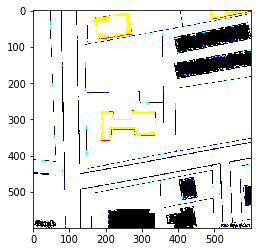

In [25]:
img_num = 0
for image in images:
#     image = 'sxm-ecommerce-p66-location-data/version2/training_images/30.166849_-81.748018_19_600x600_approx.png'

    with fs.open(image) as f:
        i = plt.imread(f, 0)
        plt.imshow(i)
        flatImage = np.reshape(i, (i.shape[0]*i.shape[1], i.shape[2]))
        
        uniqueColor, counts = np.unique(flatImage, axis=0, return_counts=True)
        sortedCounts = np.sort(counts)
        argSortedCounts = np.argsort(counts)
        
        kernelO = np.ones((5, 5), np.uint8)
        
        numColors = 4
        maxColor = np.zeros(3)
        minColor = np.array([255, 255, 255])
        scale_colors(uniqueColor, maxColor, minColor)

        contrast = boost_contrast(i, minColor, maxColor)
        plt.imshow(contrast)
        #plt.show()
        
        num = 0
        for color_idx in argSortedCounts[-numColors:]:
            #print(num)
            num += 1
            color = uniqueColor[color_idx]
            
            colorImage = i == color

            stacked = np.sum(colorImage, axis=2)
            stacked = stacked >= 3
            stacked = np.asarray(stacked, dtype=float)
            opened = cv2.morphologyEx(stacked, cv2.MORPH_OPEN, kernelO)

            lat_coords = df['merchant_location_latitude'].values[img_num]
            long_coords = df['merchant_location_longitude'].values[img_num]
#             plt.imshow(opened)
#             print(opened.shape)
#             plt.title('%f, %f_Freq:%i' % (lat_coords, long_coords, num))
#             plt.axis('off')
#             plt.savefig('data/training_freqs/img_%f, %f_freq_%i.png' % (lat_coords, long_coords, num), bbox_inches='tight')
            plt.imsave('data/testing_freqs/img_%f, %f_freq_%i.png' % (lat_coords, long_coords, num), opened)
            #plt.show()
    img_num +=1

In [44]:
#get an array of the s3 bucket where all freqs images are stored
freq_imgs = fs.ls('s3://sxm-ecommerce-p66-location-data/version1/roadmap_3000_coords/')
path = freq_imgs
#clean up jargon
freq_imgs = [str(freq).replace( 'sxm-ecommerce-p66-location-data/version1/roadmap_3000_coords/img_', '') for freq in freq_imgs]
freq_imgs = [str(freq).replace( '.png', '') for freq in freq_imgs]
print(freq_imgs)

['sxm-ecommerce-p66-location-data/version1/roadmap_3000_coords/-40.500000_-40.600000_19_600x600', 'sxm-ecommerce-p66-location-data/version1/roadmap_3000_coords/19.648940_-156.001953_19_600x600', 'sxm-ecommerce-p66-location-data/version1/roadmap_3000_coords/19.702207_-155.072582_19_600x600', 'sxm-ecommerce-p66-location-data/version1/roadmap_3000_coords/20.795521_-156.510956_19_600x600', 'sxm-ecommerce-p66-location-data/version1/roadmap_3000_coords/20.867870_-156.495804_19_600x600', 'sxm-ecommerce-p66-location-data/version1/roadmap_3000_coords/20.877458_-156.677518_19_600x600', 'sxm-ecommerce-p66-location-data/version1/roadmap_3000_coords/20.888358_-156.478413_19_600x600', 'sxm-ecommerce-p66-location-data/version1/roadmap_3000_coords/21.282715_-157.735091_19_600x600', 'sxm-ecommerce-p66-location-data/version1/roadmap_3000_coords/21.294080_-157.828811_19_600x600', 'sxm-ecommerce-p66-location-data/version1/roadmap_3000_coords/21.298292_-157.836547_19_600x600', 'sxm-ecommerce-p66-location-d

In [45]:
#create csv of all freq images to list if img is road or not
path = np.array(path)
road_or_not = {'img': freq_imgs, 'type': [0] * len(freq_imgs), 'path': path}
road_or_not_df = pd.DataFrame(road_or_not) 
road_or_not_df.to_csv('data/road_or_other3000.csv')

In [11]:
# import os
# files_in_directory = os.listdir()
# filtered_files = [file for file in files_in_directory if file.endswith(".out")]
# for file in filtered_files:
# 	path_to_file = file
# 	os.remove(path_to_file)

In [24]:
image = plt.imread('data/training_freqs/img_21.331533, -157.865814_freq_1_600_600.png', 0)
image.shape

(600, 600, 4)